<a href="https://colab.research.google.com/github/kartikeye/Early-Detection-Swarming-Using-AI/blob/main/BeeByAcoustic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import scipy
from scipy.io import wavfile
import scipy.fftpack as fft
from scipy.signal import get_window
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa
import soundfile as sf

%matplotlib inline

# **#load the file for pipping audio file**

In [ ]:
#load the file for pipping audio file

#original_audio_path = 'pipingSound.wav'
original_audio_path = '/content/drive/MyDrive/BeeKeepingProject/pyenv/MyEnvPy/pipingSound.wav'


y_pip, sr_pip = librosa.load(original_audio_path, sr=None)
#sample rate of my audio data is 48KHTz

In [ ]:
#load the audio file for not piping sound
#original_audio_path = 'NoPipingSound.wav'
original_audio_path = '/content/drive/MyDrive/BeeKeepingProject/pyenv/MyEnvPy/NoPipingSound.wav'
y_pip_not, sr_pip_not = librosa.load(original_audio_path)

In [ ]:
sr_pip_not

22050

# **# Using piping audio dataset generated**

In [ ]:
#load the file for pipping audio file which is generated using GANs
#generated audio file is already 2000 htz so no need to downsample


original_audio_path = '/content/drive/MyDrive/BeeKeepingProject/pyenv/MyEnvPy/30_minutes_audio_generated.wav'


#test1
#original_audio_path = '/content/drive/MyDrive/BeeKeepingProject/pyenv/MyEnvPy/pipingSound_resampled_test (2).wav'

y_pip_generated, sr_pip_generated = librosa.load(original_audio_path, sr=None)
#sample rate of my audio data is 48KHTz

In [ ]:
#testing the sample rate of the original audio file without downsampling
sample_rate_pip_test, audio_pip_test = wavfile.read(original_audio_path)

In [ ]:
sr_pip_generated

2000

# Downsampling the audio file to 2000 htz for better visualisation and process

In [ ]:
# Define the target sample rate (e.g., 22050 Hz for 2 kHz)
target_sr = 2000

#load for piping audio data
# Resample the audio to the target sample rate
y_resampled_pip = librosa.resample(y_pip, orig_sr=sr_pip, target_sr=target_sr)

# Save the resampled piping audio to a new file
output_file_path = 'pipingSound_resampled.wav'
#output_file_path = 'file_resampled.wav'
sf.write(output_file_path, y_resampled_pip, target_sr)
#sf.write(output_file_path, y_resampled_pip, 2000, format='WAV')


In [ ]:
y_resampled_not_pip = librosa.resample(y_pip_not, orig_sr=sr_pip_not, target_sr=target_sr)

# Save the resampled piping audio to a new file
output_file_path = 'NonpipingSound_resampled.wav'
#output_file_path = 'file_resampled.wav'
sf.write(output_file_path, y_resampled_not_pip, target_sr)

In [ ]:
y_new_pip, sr_r_pip = librosa.load("pipingSound_resampled.wav", sr=None)
y_new_not_pip, sr_r_not_pip = librosa.load("NonpipingSound_resampled.wav", sr=None)

In [ ]:
sr_r_not_pip

2000

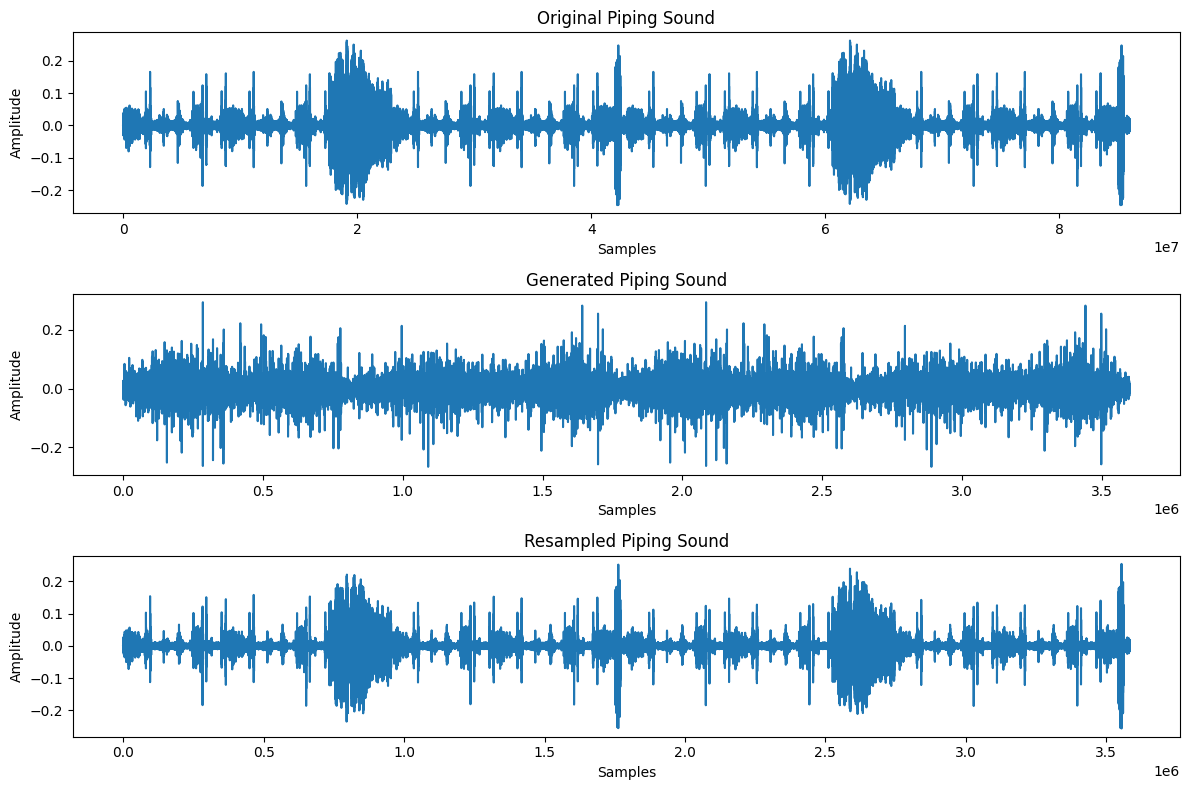

In [ ]:
# Plot the waveforms for comparison
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.title('Original Piping Sound')
plt.plot(y_pip)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 2)
plt.title('Generated Piping Sound')
plt.plot(y_pip_generated)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.subplot(3, 1, 3)
plt.title('Resampled Piping Sound')
plt.plot(y_new_pip)
plt.xlabel('Samples')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

Double checking the sampling rate of audio file which is 2000 htz

In [ ]:
from scipy.io import wavfile

# Read the resampled piping audio
sample_rate_pip, audio_pip = wavfile.read("pipingSound_resampled.wav")

# Calculate the duration in seconds
audio_duration_pip = len(audio_pip) / sample_rate_pip

print("Sample rate: {0} Hz".format(sample_rate_pip))
print("Audio duration: {0:.2f} s".format(audio_duration_pip))


Sample rate: 2000 Hz
Audio duration: 1791.63 s


In [ ]:
from scipy.io import wavfile

# Read the resampled non-piping audio
sample_rate_no_pip, audio_no_pip = wavfile.read("NonpipingSound_resampled.wav")

# Calculate the duration in seconds
audio_duration_no_pip = len(audio_no_pip) / sample_rate_no_pip

print("Sample rate: {0} Hz".format(sample_rate_no_pip))
print("Audio duration: {0:.2f} s".format(audio_duration_no_pip))


Sample rate: 2000 Hz
Audio duration: 5400.00 s


# **#Segmenting the audio file into 30 seconds and assign 0 for not piping and 1 for piping, hop length is 10 seconds**

In [ ]:
#Segmenting the audio file into 30 seconds and assign 0 for not piping and 1 for piping
import numpy as np

def segment_audio(audio, sample_rate, segment_duration, hop_duration, label):
    segments = []
    labels = []

    # Calculate the number of frames per segment and hop size in frames
    segment_samples = int(segment_duration * sample_rate)
    hop_samples = int(hop_duration * sample_rate)

    for start in range(0, len(audio) - segment_samples + 1, hop_samples):
        end = start + segment_samples
        segment = audio[start:end]

        # Append the segment to the list of segments
        segments.append(segment)

        # Append the label to the list of labels
        labels.append(label)

    return segments, labels

# Define segment duration and hop duration
segment_duration = 30  # in seconds
hop_duration = 10  # in seconds

# Segment the piping audio and assign label 1
piping_segments, piping_labels = segment_audio(y_new_pip, sr_r_pip, segment_duration, hop_duration, label=1)

# Segment the non-piping audio and assign label 0
non_piping_segments, non_piping_labels = segment_audio(y_new_not_pip, sr_r_not_pip, segment_duration, hop_duration, label=0)




## **Segment the generated piping audio and assign label 1**

In [ ]:
# Segment the generated piping audio and assign label 1
generated_piping_segments, generated_piping_labels = segment_audio(y_pip_generated, sr_pip_generated, segment_duration, hop_duration, label=1)

In [ ]:
piping_segments[0].shape

(60000,)

In [ ]:
generated_piping_segments[0].shape

(60000,)

# Testing the segment back to audio file

In [ ]:
#changing the piping segment back to the audio file
from scipy.io import wavfile

# Concatenate all the piping segments into a single audio array
#piping_audio = np.concatenate(piping_segments)

# Specify the output WAV file name
output_wav_file = 'piping_segments_audio.wav'

# Write the concatenated audio data to a WAV file
wavfile.write(output_wav_file, sr_r_pip, piping_audio)

**Testing the segment back to audio file**

In [ ]:

#changing only one piping segment back to the audio file
from scipy.io import wavfile

# Concatenate all the piping segments into a single audio array
piping_audio = np.concatenate(piping_segments)

# Specify the output WAV file name
output_wav_file = 'Gen_piping_segments_audio_1.wav'

# Write the concatenated audio data to a WAV file
wavfile.write(output_wav_file, sr_r_pip, generated_segment)

In [ ]:
piping_segments[0].shape

(60000,)

##  create some spectogram to visualis original piping segments

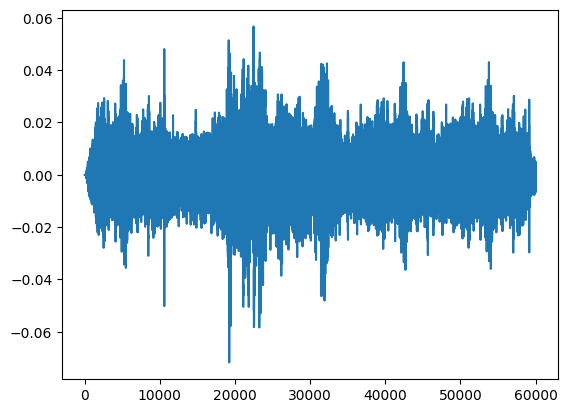

In [ ]:
#  create some spectogram to visualis original piping segments

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

plt.plot(piping_segments[0])
plt.show()

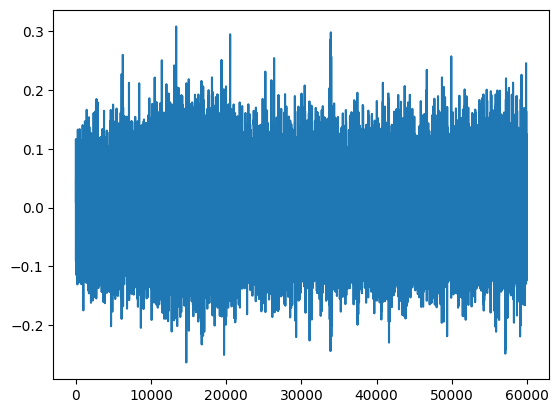

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(non_piping_segments[0])
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
piping_segments[0].shape

(60000,)

ATtempt improviese resectly 1, My latest attempt

# Final working for GANs for genrating a segment of 30 seconds duration **3/4**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM, Conv1D, Conv1DTranspose, LeakyReLU, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import soundfile as sf

# Assuming `piping_segments` is a list where each item is a 1D NumPy array with shape (60000,)

# Preprocess the data: convert list of 1D segments into a single 3D NumPy array
piping_segments_np = np.array([segment.reshape(-1, 1) for segment in piping_segments])

def build_generator(latent_dim, segment_shape):
    model = Sequential()
    # Start with a Dense layer to get the correct number of elements
    model.add(Dense(128 * segment_shape[0] // 8, activation="relu", input_dim=latent_dim))
    # Reshape to a shape that can be upsampled to the final segment shape
    model.add(Reshape((segment_shape[0] // 8, 128)))
    # Add several Conv1DTranspose layers with increasing dilation rate
    model.add(Conv1DTranspose(64, kernel_size=3, strides=2, padding='same', activation="relu"))
    model.add(Conv1DTranspose(32, kernel_size=3, strides=2, padding='same', activation="relu"))
    # Upsample to the final desired shape, which is the shape of the segment
    model.add(Conv1DTranspose(1, kernel_size=3, strides=2, padding='same', activation="tanh"))
    noise = Input(shape=(latent_dim,))
    segment = model(noise)
    # No need to reshape as the last Conv1DTranspose layer should output the (60000, 1) shape
    return Model(noise, segment)

# Define the GAN's discriminator
def build_discriminator(segment_shape):
    model = Sequential([
        Conv1D(64, 3, strides=2, input_shape=segment_shape, padding="same"),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),
        Conv1D(128, 3, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    segment = Input(shape=segment_shape)
    validity = model(segment)
    return Model(segment, validity)

latent_dim = 100
segment_shape = (60000, 1)  # This should match the shape of your preprocessed segments

# Build and compile the discriminator
discriminator = build_discriminator(segment_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, segment_shape)

# Generator takes noise as input and generates segments
z = Input(shape=(latent_dim,))
segment = generator(z)

# For the combined model, only train the generator
discriminator.trainable = False
validity = discriminator(segment)

# The combined model (stacked generator and discriminator)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
epochs = 5000
batch_size = 32

for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, piping_segments_np.shape[0], batch_size)
    real_segments = piping_segments_np[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_segments = generator.predict(noise)

    real_loss = discriminator.train_on_batch(real_segments, np.ones((batch_size, 1)))
    fake_loss = discriminator.train_on_batch(fake_segments, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Progress logging
    print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

    # Save generated audio samples periodically
    if epoch % 100 == 0:
        sample_noise = np.random.normal(0, 1, (1, latent_dim))
        sample_segment = generator.predict(sample_noise)
        sf.write(f'generated_segment_epoch_{epoch}.wav', sample_segment.flatten(), 2000)

# Generate a final segment after training
final_noise = np.random.normal(0, 1, (1, latent_dim))
final_generated_segment = generator.predict(final_noise)
sf.write('final_generated_segment.wav', final_generated_segment.flatten(), 2000)


1/1 [==============================] - 2s 2s/step
0 [D loss: 0.7017150819301605, acc.: 28.12%] [G loss: 0.7034919261932373]
1/1 [==============================] - 1s 841ms/step
1 [D loss: 0.6897957623004913, acc.: 31.25%] [G loss: 0.7039550542831421]
1/1 [==============================] - 1s 844ms/step
2 [D loss: 0.6628641486167908, acc.: 37.50%] [G loss: 0.7105740308761597]
1/1 [==============================] - 1s 1s/step
3 [D loss: 0.6584230661392212, acc.: 65.62%] [G loss: 0.7186700105667114]
1/1 [==============================] - 1s 816ms/step
4 [D loss: 0.648130863904953, acc.: 50.00%] [G loss: 0.7221531271934509]
1/1 [==============================] - 1s 839ms/step
5 [D loss: 0.6683229804039001, acc.: 50.00%] [G loss: 0.7131251692771912]
1/1 [==============================] - 1s 997ms/step
6 [D loss: 0.6813117861747742, acc.: 50.00%] [G loss: 0.7018123865127563]
1/1 [==============================] - 1s 1s/step
7 [D loss: 0.693423867225647, acc.: 43.75%] [G loss: 0.7024311423301

# **Gnerating 15+15 minutes audio**

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Reshape, LSTM, Conv1D, Conv1DTranspose, LeakyReLU, Dropout, BatchNormalization, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import soundfile as sf

# Assuming `piping_segments` is a list where each item is a 1D NumPy array with shape (60000,)

# Preprocess the data: convert list of 1D segments into a single 3D NumPy array
piping_segments_np = np.array([segment.reshape(-1, 1) for segment in piping_segments])

def build_generator(latent_dim, segment_shape):
    model = Sequential()
    # Start with a Dense layer to get the correct number of elements
    model.add(Dense(128 * segment_shape[0] // 8, activation="relu", input_dim=latent_dim))
    # Reshape to a shape that can be upsampled to the final segment shape
    model.add(Reshape((segment_shape[0] // 8, 128)))
    # Add several Conv1DTranspose layers with increasing dilation rate
    model.add(Conv1DTranspose(64, kernel_size=3, strides=2, padding='same', activation="relu"))
    model.add(Conv1DTranspose(32, kernel_size=3, strides=2, padding='same', activation="relu"))
    # Upsample to the final desired shape, which is the shape of the segment
    model.add(Conv1DTranspose(1, kernel_size=3, strides=2, padding='same', activation="tanh"))
    noise = Input(shape=(latent_dim,))
    segment = model(noise)
    # No need to reshape as the last Conv1DTranspose layer should output the (60000, 1) shape
    return Model(noise, segment)

# Define the GAN's discriminator
def build_discriminator(segment_shape):
    model = Sequential([
        Conv1D(64, 3, strides=2, input_shape=segment_shape, padding="same"),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),
        Conv1D(128, 3, strides=2, padding="same"),
        LeakyReLU(alpha=0.2),
        Dropout(0.25),
        Flatten(),
        Dense(1, activation='sigmoid')
    ])
    segment = Input(shape=segment_shape)
    validity = model(segment)
    return Model(segment, validity)

latent_dim = 100
segment_shape = (60000, 1)  # This should match the shape of your preprocessed segments

# Build and compile the discriminator
discriminator = build_discriminator(segment_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

# Build the generator
generator = build_generator(latent_dim, segment_shape)

# Generator takes noise as input and generates segments
z = Input(shape=(latent_dim,))
segment = generator(z)

# For the combined model, only train the generator
discriminator.trainable = False
validity = discriminator(segment)

# The combined model (stacked generator and discriminator)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

# Training the GAN
epochs = 5000
batch_size = 32

for epoch in range(epochs):
    # Train the discriminator
    idx = np.random.randint(0, piping_segments_np.shape[0], batch_size)
    real_segments = piping_segments_np[idx]
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    fake_segments = generator.predict(noise)

    real_loss = discriminator.train_on_batch(real_segments, np.ones((batch_size, 1)))
    fake_loss = discriminator.train_on_batch(fake_segments, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(real_loss, fake_loss)

    # Train the generator
    g_loss = combined.train_on_batch(noise, np.ones((batch_size, 1)))

    # Progress logging
    print(f"{epoch} [D loss: {d_loss[0]}, acc.: {100*d_loss[1]:.2f}%] [G loss: {g_loss}]")

    # Save generated audio samples periodically
    if epoch % 100 == 0:
        sample_noise = np.random.normal(0, 1, (1, latent_dim))
        sample_segment = generator.predict(sample_noise)
        sf.write(f'generated_segment_epoch_{epoch}.wav', sample_segment.flatten(), 2000)



# Adjust the number of segments for 15 minutes of audio, given each segment is 30 seconds
num_segments = 30
# Prepare the noise input for generating 30 segments
noise_input = np.random.normal(0, 1, (num_segments, latent_dim))
# Generate the 30-second audio segments
generated_segments = generator.predict(noise_input)

# Concatenate all generated segments into a single audio file
# Assuming each segment is already in the correct shape, we can flatten them as needed
long_audio = np.concatenate([segment.flatten() for segment in generated_segments])

# Save the 15-minute long audio
sf.write('15_minute_audio.wav', long_audio, 2000)



Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 175ms/step
2513 [D loss: 0.5991753935813904, acc.: 68.75%] [G loss: 0.9219323396682739]
1/1 [==============================] - 0s 213ms/step
2514 [D loss: 0.6112399101257324, acc.: 70.31%] [G loss: 0.9487549662590027]
1/1 [==============================] - 0s 181ms/step
2515 [D loss: 0.5937535166740417, acc.: 68.75%] [G loss: 0.981958270072937]
1/1 [==============================] - 0s 188ms/step
2516 [D loss: 0.6212420761585236, acc.: 68.75%] [G loss: 0.9265472888946533]
1/1 [==============================] - 0s 181ms/step
2517 [D loss: 0.5876763761043549, acc.: 75.00%] [G loss: 0.9619852304458618]
1/1 [==============================] - 0s 169ms/step
2518 [D loss: 0.6042493581771851, acc.: 64.06%] [G loss: 0.9187545776367188]
1/1 [==============================] - 0s 181ms/step
2519 [D loss: 0.5620478391647339, acc.: 68.75%] [G loss: 0.964017391204834]
1/1 [==============================] - 0s

In [ ]:
long_audio.shape

(1800000,)

## **Denoise the generated piping datset**

In [ ]:
import numpy as np
from scipy.signal import butter, lfilter
import soundfile as sf

def butter_lowpass_filter(data, cutoff, fs, order=5):
    nyq = 0.5 * fs  # Nyquist frequency
    normal_cutoff = cutoff / nyq  # Normalized cutoff frequency
    print(f"Normalized cutoff frequency: {normal_cutoff}")  # Logging for debugging
    if not 0 < normal_cutoff < 1:
        raise ValueError(f"Cutoff frequency must be between 0 and {nyq} Hz for the given sampling rate. Provided cutoff was {cutoff} Hz.")
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

def reduce_crackling_noise(y_pip_generated, sr_pip_generated, cutoff=800, order=6):
    audio_filtered = butter_lowpass_filter(y_pip_generated, cutoff, sr_pip_generated, order)
    return audio_filtered

try:
    reduced_noise_audio = reduce_crackling_noise(y_pip_generated, sr_pip_generated)
    # Save the filtered audio with soundfile
    sf.write('filtered_audio_corrected.wav', reduced_noise_audio, sr_pip_generated)
except ValueError as e:
    print(e)


Normalized cutoff frequency: 0.8


# **Using Denoised Piping audio Generated**

In [ ]:


#original_audio_path = 'pipingSound.wav'
original_audio_path = '/content/drive/MyDrive/BeeKeepingProject/pyenv/MyEnvPy/filtered_audio_corrected.wav'


y_pip_generated_denoised, sr_pip_generated_denoised = librosa.load(original_audio_path, sr=None)

In [ ]:
sr_pip

2000

# **Segmenting and labelling 1 of denoised generated audio dataset**

In [ ]:
#Segment the generated denoised piping audio and assighn leble 1
#info: run this code after loading the piping denoise audio dataset

generated_denoised_piping_segments, generated_denoised_piping_labels = segment_audio(y_pip_generated_denoised, sr_pip_generated_denoised, segment_duration, hop_duration, label=1)

In [ ]:
piping_segments

[array([-3.0517578e-05, -3.0517578e-05, -3.0517578e-05, ...,
         9.7656250e-04, -9.7656250e-04,  1.2512207e-03], dtype=float32),
 array([-0.01519775, -0.00891113, -0.00720215, ..., -0.01498413,
        -0.01547241, -0.0135498 ], dtype=float32),
 array([0.01312256, 0.00827026, 0.00244141, ..., 0.00265503, 0.00192261,
        0.00167847], dtype=float32),
 array([ 0.00445557,  0.00473022,  0.00073242, ..., -0.00137329,
         0.00119019,  0.00439453], dtype=float32),
 array([-0.01327515, -0.01397705, -0.01953125, ..., -0.00048828,
         0.0007019 ,  0.00109863], dtype=float32),
 array([ 0.00073242, -0.00039673, -0.0015564 , ...,  0.00393677,
         0.00250244,  0.0015564 ], dtype=float32),
 array([-3.0517578e-05,  4.5776367e-04, -9.7656250e-04, ...,
         3.6926270e-03,  2.9296875e-03, -2.4414062e-03], dtype=float32),
 array([ 0.00024414,  0.00204468, -0.0012207 , ...,  0.01062012,
         0.00805664,  0.00299072], dtype=float32),
 array([-4.4250488e-03, -2.0446777e-03, -6

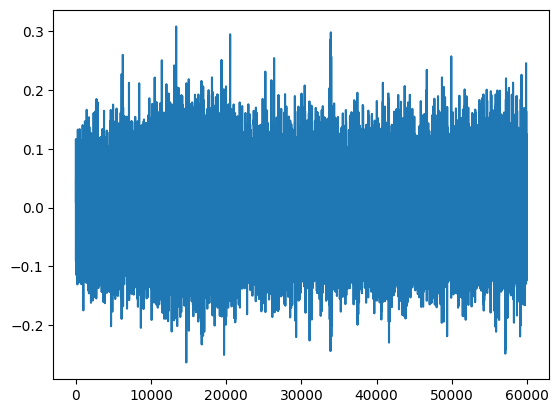

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(non_piping_segments[0])
plt.show()

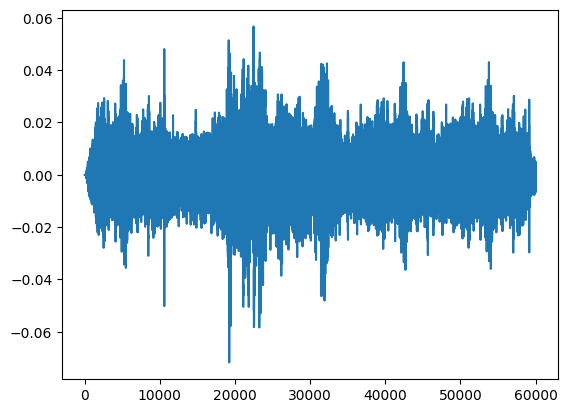

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(piping_segments[0])
plt.show()

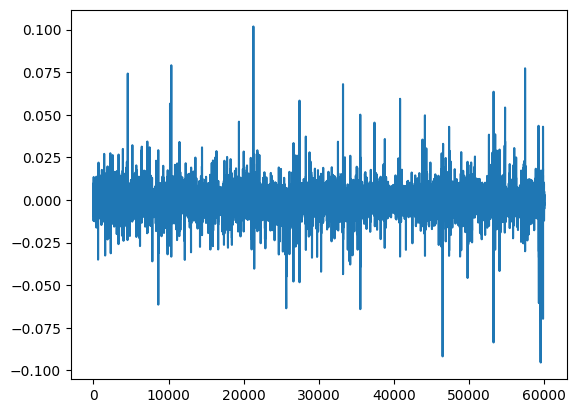

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.plot(generated_denoised_piping_segments[0])
plt.show()


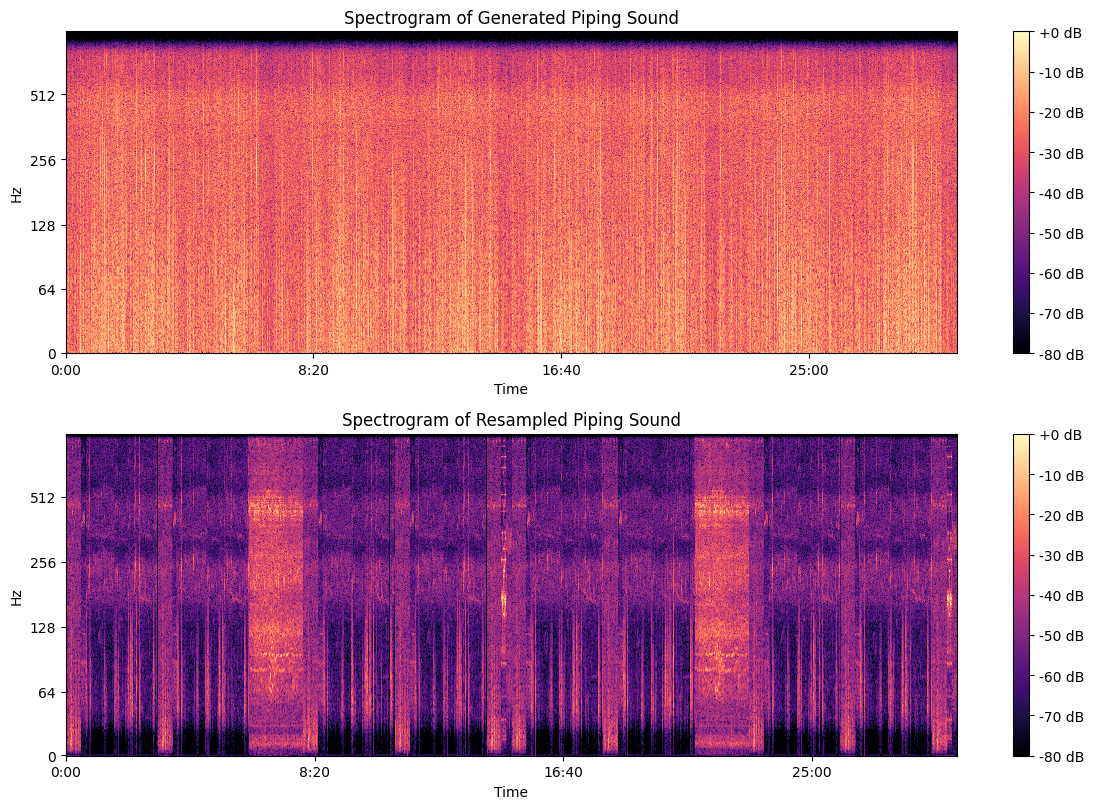

In [ ]:
# Plot the spectrograms for comparison
plt.figure(figsize=(12, 12))



# Generated Piping Sound
plt.subplot(3, 1, 2)
plt.title('Spectrogram of Generated Piping Sound')
D_pip_generated = librosa.amplitude_to_db(np.abs(librosa.stft(y_pip_generated_denoised)), ref=np.max)
librosa.display.specshow(D_pip_generated, sr=sr_pip_generated, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

# Resampled Piping Sound
plt.subplot(3, 1, 3)
plt.title('Spectrogram of Resampled Piping Sound')
D_resampled_pip = librosa.amplitude_to_db(np.abs(librosa.stft(y_new_pip)), ref=np.max)
librosa.display.specshow(D_resampled_pip, sr=sr_r_pip, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')

plt.tight_layout()
plt.show()

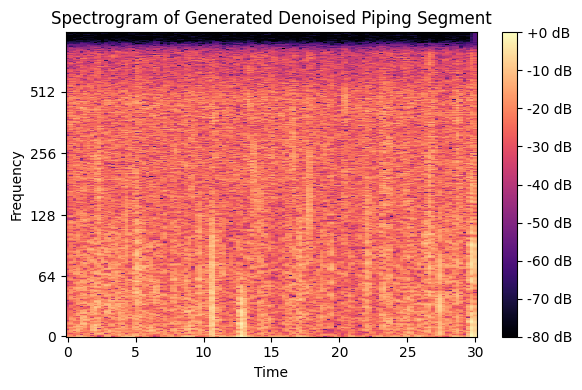

In [ ]:
# Extract the specific segment
audio_segment = generated_denoised_piping_segments[0]

# Plot the spectrogram for the segment
plt.figure(figsize=(6, 4))
plt.title('Spectrogram of Generated Denoised Piping Segment')

# Compute the spectrogram
D_segment = librosa.amplitude_to_db(np.abs(librosa.stft(audio_segment)), ref=np.max)
librosa.display.specshow(D_segment, sr=sr_pip_generated_denoised, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

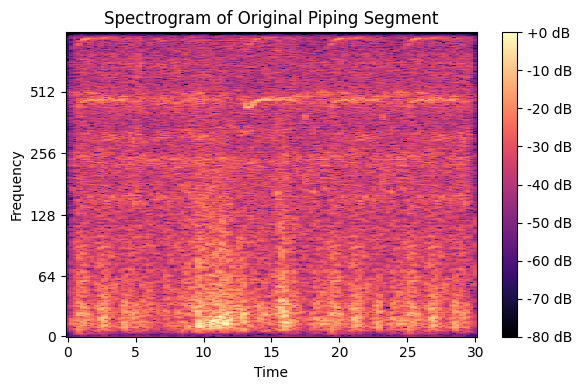

In [ ]:
# Extract the specific segment
audio_segment = piping_segments[0]

# Plot the spectrogram for the segment
plt.figure(figsize=(6, 4))
plt.title('Spectrogram of Original Piping Segment')

# Compute the spectrogram
D_segment = librosa.amplitude_to_db(np.abs(librosa.stft(audio_segment)), ref=np.max)
librosa.display.specshow(D_segment, sr=sr_pip_generated_denoised, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
sr_pip_generated

2000

# **Computing IMFCC Step after segments for original audio dataset**

In [ ]:
import numpy as np
import librosa

def compute_imfccs_for_segments(segments, sample_rate, n_mfcc):
    imfccs_list = []

    for segment in segments:
        # Compute IMFCC coefficients for the segment
        imfccs = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=n_mfcc)
        imfccs_list.append(imfccs)

    return imfccs_list

# Define the number of IMFCC coefficients
n_mfcc = 13

# Compute IMFCCs for piping segments with label 1
imfccs_piping = compute_imfccs_for_segments(piping_segments, sr_r_pip, n_mfcc)

# Compute IMFCCs for non-piping segments with label 0
imfccs_non_piping = compute_imfccs_for_segments(non_piping_segments, sr_r_not_pip, n_mfcc)


# **IMFCC for generated audio data set**

In [ ]:
import numpy as np
import librosa

def compute_imfccs_for_segments(segments, sample_rate, n_mfcc):
    imfccs_list = []

    for segment in segments:
        # Compute IMFCC (MFCC) coefficients for the segment
        imfccs = librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=n_mfcc)
        imfccs_list.append(imfccs)

    return imfccs_list

# Define the number of IMFCC (MFCC) coefficients
n_mfcc = 13

# Compute IMFCCs for the generated piping segments with label 1
# Assuming generated_piping_segments and sr_pip_generated are defined from your previous steps
imfccs_generated_piping = compute_imfccs_for_segments(generated_piping_segments, sr_pip_generated, n_mfcc)


# **IMFCC for denoised generated audio dataset piping**

In [ ]:
imfccs_generated_piping_denoise = compute_imfccs_for_segments(generated_denoised_piping_segments, sr_pip_generated_denoised, n_mfcc)


**after imfcc makingn the data frame step**

In [ ]:
import pandas as pd

def create_imfcc_dataframe(imfccs_list, labels):
    imfcc_df = pd.DataFrame({
        'IMFCCs': imfccs_list,
        'Label': labels
    })
    return imfcc_df

# Create DataFrame for piping segments
piping_imfcc_df = create_imfcc_dataframe(imfccs_piping, piping_labels)

# Create DataFrame for non-piping segments
non_piping_imfcc_df = create_imfcc_dataframe(imfccs_non_piping, non_piping_labels)

# Combine both DataFrames
combined_imfcc_df = pd.concat([piping_imfcc_df, non_piping_imfcc_df], ignore_index=True)


# **generated piping dataframe**

In [ ]:
generated_piping_labels = [1] * len(imfccs_generated_piping)
generated_piping_imfcc_df = create_imfcc_dataframe(imfccs_generated_piping, generated_piping_labels)
combined_imfcc_df_generated = generated_piping_imfcc_df.copy()


In [ ]:
combined_imfcc_df_with_generated_pip = pd.concat([combined_imfcc_df, combined_imfcc_df_generated], ignore_index=True)


# **generated denoised piping dataframe**

In [ ]:
denoised_generated_piping_labels = [1] * len(imfccs_generated_piping_denoise)
denoised_generated_piping_imfcc_df = create_imfcc_dataframe(imfccs_generated_piping_denoise, denoised_generated_piping_labels)
combined_imfcc_df_with_generated_pip_denoise = denoised_generated_piping_imfcc_df.copy()

# **IMFCC dataframe with dnoised generated dataset of audio**

In [ ]:
combined_imfcc_df_with_generated_denoised_pip = pd.concat([combined_imfcc_df, combined_imfcc_df_with_generated_pip_denoise], ignore_index=True)


In [ ]:
combined_imfcc_df_with_generated_pip

,IMFCCs,Label
0,"[[-431.04086, -308.03778, -242.2286, -201.9516...",1
1,"[[-211.80624, -178.84903, -184.21344, -185.233...",1
2,"[[-230.19139, -196.28494, -198.9144, -192.8292...",1
3,"[[-381.65665, -354.98526, -359.54773, -352.827...",1
4,"[[-296.97607, -261.41287, -264.95422, -263.184...",1
...,...,...
888,"[[-237.57672, -209.90367, -206.10324, -183.879...",1
889,"[[-200.15904, -189.91252, -194.73402, -201.048...",1
890,"[[-226.38318, -205.03023, -216.60777, -199.387...",1
891,"[[-261.03687, -228.11584, -210.99838, -179.273...",1


In [ ]:
#from 1 to 176 value is 1
combined_imfcc_df_with_generated_pip.Label[679]

0

In [ ]:
#from 177 to 714 label is 0
combined_imfcc_df.Label[714]

0

In [ ]:
combined_imfcc_df_with_generated_pip.Label

0

# **Worikiing LSTM model**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Data Augmentation
#def add_noise(data, noise_level=0.005):
#    noise = np.random.randn(len(data))
#    augmented_data = data + noise_level * noise
#    return augmented_data.astype(type(data[0]))

# Assume y_data is your audio data array and y is labels
# y_augmented = [add_noise(y, noise_level=0.005) for y in y_data]

# Normalize your features (implement after augmentation)
# Flatten if necessary, normalize, then reshape
scaler = StandardScaler()

# Placeholder for X and y. You should load/preprocess your dataset here.
# X, y = load_your_data()
#_____________________________________________________________
#with simple original audio data set
#--------------- Separate features (IMFCCs) and labels
X = np.array(combined_imfcc_df['IMFCCs'].tolist())
y = np.array(combined_imfcc_df['Label'])

#-------------- Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)
#___________________________________________________________________________________________


#____________________________________________________________________
#with original dataset and generated piping auido dataset but without denoiseing
# For the combined dataset (training)
#X_train = np.array(combined_imfcc_df_with_generated_pip['IMFCCs'].tolist())
#y_train = np.array(combined_imfcc_df_with_generated_pip['Label'])

#X = np.array(combined_imfcc_df_with_generated_pip['IMFCCs'].tolist())
#y = np.array(combined_imfcc_df_with_generated_pip['Label'])

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)
# For the piping dataset (testing)
#X_test = np.array(combined_imfcc_df['IMFCCs'].tolist())
#y_test = np.array(combined_imfcc_df['Label'])
#_______________________________________________________________________

#___________________________________________________________________________________________
#with denoised audio dataset only
#X_train = np.array(combined_imfcc_df_with_generated_denoised_pip['IMFCCs'].tolist())
#y_train = np.array(combined_imfcc_df_with_generated_denoised_pip['Label'])

#X_test = np.array(combined_imfcc_df['IMFCCs'].tolist())
#y_test = np.array(combined_imfcc_df['Label'])
#____________________________________________________________________________________________

#________________________________________________________________________________________
#with testing and traing with the denoised generated audio dataset

#X = np.array(combined_imfcc_df_with_generated_denoised_pip['IMFCCs'].tolist())
#y = np.array(combined_imfcc_df_with_generated_denoised_pip['Label'])

#-------------- Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

#_________________________________________________________________________________________

# Model creation with regularization and dropout
def create_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True, kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        LSTM(32, kernel_regularizer=l2(0.001)),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, mode='min', restore_best_weights=True)

# Model training
model = create_model((X_train.shape[1], X_train.shape[2]))
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping]
)

# Model evaluation
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_classes)
report = classification_report(y_test, y_pred_classes)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)




Epoch 1/100
13/13 [==============================] - 4s 83ms/step - loss: 0.7735 - accuracy: 0.7325 - val_loss: 0.5735 - val_accuracy: 0.8500
Epoch 2/100
13/13 [==============================] - 0s 17ms/step - loss: 0.6379 - accuracy: 0.7925 - val_loss: 0.4686 - val_accuracy: 0.8800
Epoch 3/100
13/13 [==============================] - 0s 17ms/step - loss: 0.5073 - accuracy: 0.8800 - val_loss: 0.3668 - val_accuracy: 0.9900
Epoch 4/100
13/13 [==============================] - 0s 17ms/step - loss: 0.3777 - accuracy: 0.9825 - val_loss: 0.2842 - val_accuracy: 0.9800
Epoch 5/100
13/13 [==============================] - 0s 17ms/step - loss: 0.2968 - accuracy: 0.9950 - val_loss: 0.2394 - val_accuracy: 0.9900
Epoch 6/100
13/13 [==============================] - 0s 17ms/step - loss: 0.2583 - accuracy: 0.9950 - val_loss: 0.2549 - val_accuracy: 0.9800
Epoch 7/100
13/13 [==============================] - 0s 17ms/step - loss: 0.2590 - accuracy: 0.9900 - val_loss: 0.2384 - val_accuracy: 0.9800
Epoch 

In [ ]:
X_train.shape[1]

13

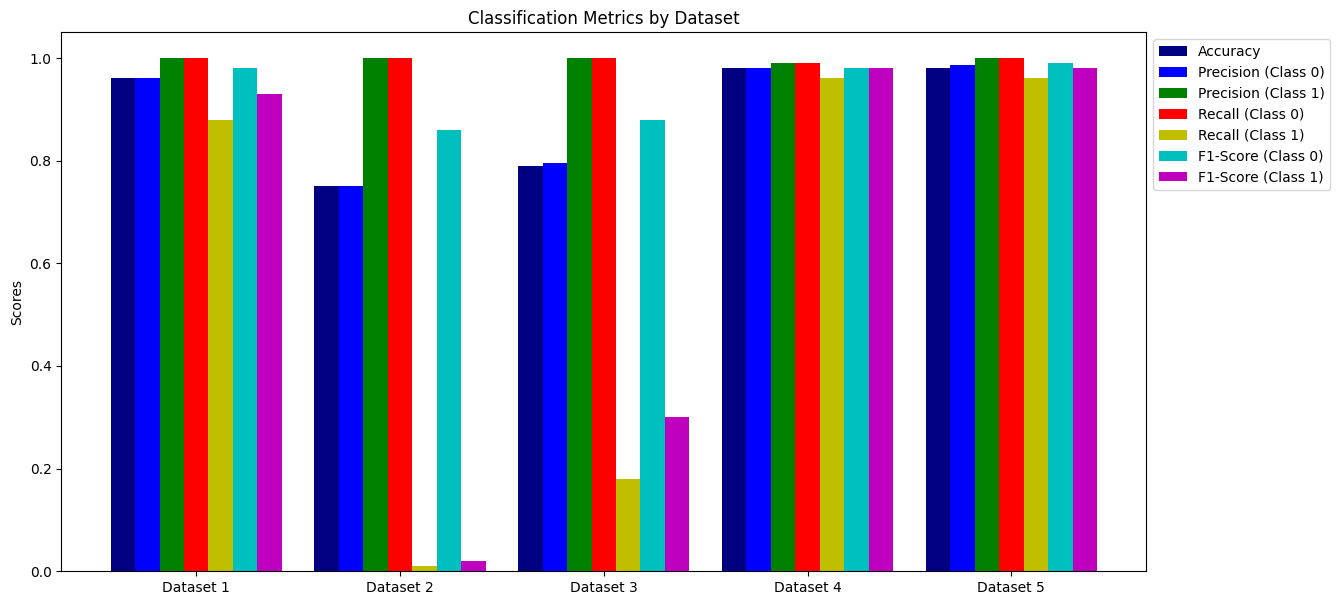

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from your table
data = {
    "Experiment": [
        "Dataset 1", "Dataset 2", "Dataset 3", "Dataset 4", "Dataset 5"
    ],
    "Accuracy": [0.96, 0.75, 0.79, 0.98, 0.98],
    "Precision (Class 0)": [0.96, 0.75, 0.7958, 0.9813, 0.9857],
    "Precision (Class 1)": [1.00, 1.00, 1.00, 0.99, 1.00],
    "Recall (Class 0)": [1.00, 1.00, 1.00, 0.99, 1.00],
    "Recall (Class 1)": [0.88, 0.01, 0.18, 0.96, 0.96],
    "F1-Score (Class 0)": [0.98, 0.86, 0.88, 0.98, 0.99],
    "F1-Score (Class 1)": [0.93, 0.02, 0.30, 0.98, 0.98]
}
# Creating DataFrame
df = pd.DataFrame(data)

# Set the positions and width for the bars
positions = list(range(len(df['Accuracy'])))
width = 0.12  # adjust width to fit more bars

# Plotting
fig, ax = plt.subplots(figsize=(14, 7))  # wider figure

# Creating bars for each metric
plt.bar(positions, df['Accuracy'], width, label='Accuracy', color='navy', align='center')
plt.bar([p + width for p in positions], df['Precision (Class 0)'], width, label='Precision (Class 0)', color='b', align='center')
plt.bar([p + width*2 for p in positions], df['Precision (Class 1)'], width, label='Precision (Class 1)', color='g', align='center')
plt.bar([p + width*3 for p in positions], df['Recall (Class 0)'], width, label='Recall (Class 0)', color='r', align='center')
plt.bar([p + width*4 for p in positions], df['Recall (Class 1)'], width, label='Recall (Class 1)', color='y', align='center')
plt.bar([p + width*5 for p in positions], df['F1-Score (Class 0)'], width, label='F1-Score (Class 0)', color='c', align='center')
plt.bar([p + width*6 for p in positions], df['F1-Score (Class 1)'], width, label='F1-Score (Class 1)', color='m', align='center')

# Adding labels and title
ax.set_ylabel('Scores')
ax.set_title('Classification Metrics by Dataset')
ax.set_xticks([p + 3 * width for p in positions])
ax.set_xticklabels(df['Experiment'])

# Adding a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

plt.show()


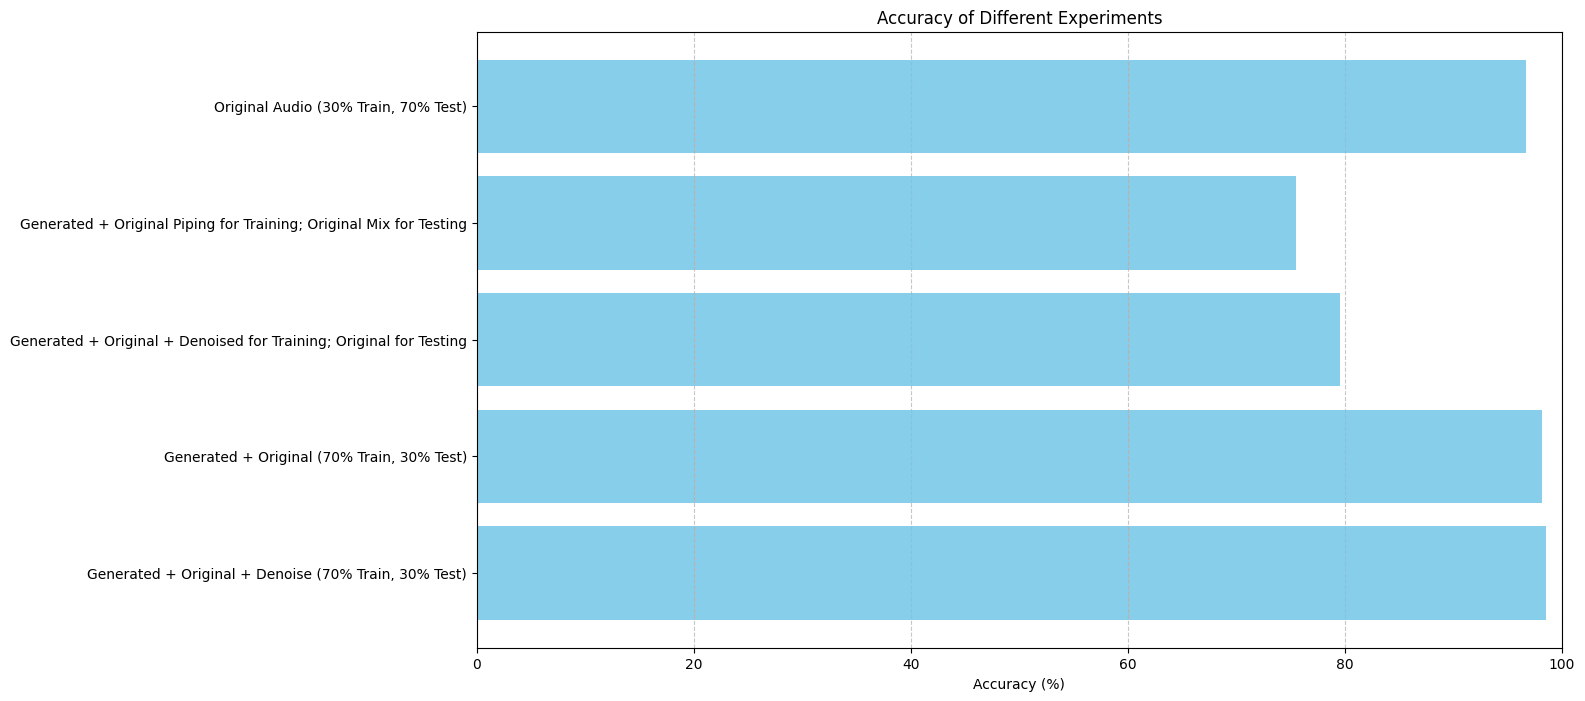

In [ ]:
import matplotlib.pyplot as plt

# Data
experiments = [
    "Original Audio (30% Train, 70% Test)",
    "Generated + Original Piping for Training; Original Mix for Testing",
    "Generated + Original + Denoised for Training; Original for Testing",
    "Generated + Original (70% Train, 30% Test)",
    "Generated + Original + Denoise (70% Train, 30% Test)"
]
accuracy = [96.74, 75.52, 79.58, 98.13, 98.57]

# Plotting
plt.figure(figsize=(14, 8))
plt.barh(experiments, accuracy, color='skyblue')
plt.xlabel('Accuracy (%)')
plt.title('Accuracy of Different Experiments')
plt.xlim(0, 100)  # Set x-axis limit from 0 to 100
plt.gca().invert_yaxis()  # Invert y-axis to have the first experiment on top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()


In [ ]:
# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()